In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [67]:
import re

In [68]:
df = pd.read_csv('/Users/svetlanaponamarenko/Downloads/shein_footwear.csv', encoding='windows-1252')

In [69]:
df.head()

,name,link,price_usd,mark_price_usd,star_rating,colour,seller_name,review_count,sku_id,hero_image
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,$19.40,$24.40,4.83,: Khaki,Womens Shoes,(77 Reviews),SKU: sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,$14.90,$18.80,0.00,NaN,Limeiya Factory,NaN,SKU: sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,$7.50,$18.80,4.92,NaN,Dawanfu,(66 Reviews),SKU: sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,$12.06,$21.30,0.00,: Purple,NaN,(41 Reviews),SKU: sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,$13.53,$17.05,0.00,: Grey,NaN,(100+ Reviews),SKU: sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1170 non-null   object 
 1   link            1170 non-null   object 
 2   price_usd       930 non-null    object 
 3   mark_price_usd  877 non-null    object 
 4   star_rating     1170 non-null   float64
 5   colour          923 non-null    object 
 6   seller_name     9 non-null      object 
 7   review_count    1075 non-null   object 
 8   sku_id          1170 non-null   object 
 9   hero_image      1170 non-null   object 
dtypes: float64(1), object(9)
memory usage: 91.5+ KB


In [71]:
df.isnull().sum()

name                 0
link                 0
price_usd          240
mark_price_usd     293
star_rating          0
colour             247
seller_name       1161
review_count        95
sku_id               0
hero_image           0
dtype: int64

In [72]:
df['seller_name'].isnull().sum() / len(df)

0.9923076923076923

In [73]:
#удаление столбца, в котором 99% значений отсутствует, и столбцов, которые в дальнейшем при анализе не будут использованы  

del df['seller_name']
del df['hero_image']
del df['link']
del df['sku_id']

In [74]:
df.head()

,name,price_usd,mark_price_usd,star_rating,colour,review_count
0,"Women's Casual Sports Shoes, Fashionable Versa...",$19.40,$24.40,4.83,: Khaki,(77 Reviews)
1,2024 New Spring/Autumn Women Breathable Mesh H...,$14.90,$18.80,0.00,NaN,NaN
2,Women's Casual Slip-on Flat Skate Shoes With A...,$7.50,$18.80,4.92,NaN,(66 Reviews)
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",$12.06,$21.30,0.00,: Purple,(41 Reviews)
4,Women's Fashionable Casual Sneakers,$13.53,$17.05,0.00,: Grey,(100+ Reviews)


In [75]:
df[df.duplicated()]

,name,price_usd,mark_price_usd,star_rating,colour,review_count


In [76]:
df.describe()

,star_rating
count,1170.000000
mean,0.033376
std,0.402427
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.920000


In [77]:
df['price_usd'] = df['price_usd'].apply(lambda x: str(x).replace('$', ''))
df['mark_price_usd'] = df['mark_price_usd'].apply(lambda x: str(x).replace('$', ''))

In [78]:
df['price_usd'].value_counts()

price_usd
nan      240
From      31
19.70     16
14.50     12
19.30     12
        ... 
4.85       1
24.30      1
13.10      1
18.24      1
0.61       1
Name: count, Length: 401, dtype: int64

In [79]:
# т.к. преобразованию цены в тип float мешают строковые значения 'From' и 'nan', заменим его пока на NaN

df.loc[(df['price_usd']=='From')|(df['price_usd']=='nan'), 'price_usd'] = np.nan

In [80]:
df['mark_price_usd'].value_counts()

mark_price_usd
nan       293
24.80      15
18.30      13
21.00      13
24.30      13
         ... 
38.88       1
106.00      1
22.77       1
27.28       1
56.60       1
Name: count, Length: 312, dtype: int64

In [81]:
df.loc[df['mark_price_usd']=='nan', 'mark_price_usd'] = np.nan

In [82]:
df['price_usd'] = df['price_usd'].astype(float)
df['mark_price_usd'] = df['mark_price_usd'].astype(float)

In [83]:
df.head()

,name,price_usd,mark_price_usd,star_rating,colour,review_count
0,"Women's Casual Sports Shoes, Fashionable Versa...",19.40,24.40,4.83,: Khaki,(77 Reviews)
1,2024 New Spring/Autumn Women Breathable Mesh H...,14.90,18.80,0.00,NaN,NaN
2,Women's Casual Slip-on Flat Skate Shoes With A...,7.50,18.80,4.92,NaN,(66 Reviews)
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",12.06,21.30,0.00,: Purple,(41 Reviews)
4,Women's Fashionable Casual Sneakers,13.53,17.05,0.00,: Grey,(100+ Reviews)


In [95]:
df['review_count'] = df[df['review_count'].notna()]['review_count'].apply(lambda x: ''.join(re.findall('\d', str(x))))

In [98]:
df['review_count'] = df['review_count'].astype(float)

In [99]:
df.head()

,name,price_usd,mark_price_usd,star_rating,colour,review_count,review_count_2
0,"Women's Casual Sports Shoes, Fashionable Versa...",19.40,24.40,4.83,: Khaki,77.0,77
1,2024 New Spring/Autumn Women Breathable Mesh H...,14.90,18.80,0.00,NaN,NaN,NaN
2,Women's Casual Slip-on Flat Skate Shoes With A...,7.50,18.80,4.92,NaN,66.0,66
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",12.06,21.30,0.00,: Purple,41.0,41
4,Women's Fashionable Casual Sneakers,13.53,17.05,0.00,: Grey,100.0,100


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1170 non-null   object 
 1   price_usd       899 non-null    float64
 2   mark_price_usd  877 non-null    float64
 3   star_rating     1170 non-null   float64
 4   colour          923 non-null    object 
 5   review_count    1075 non-null   float64
 6   review_count_2  1075 non-null   object 
dtypes: float64(4), object(3)
memory usage: 64.1+ KB


In [101]:
numeric_cols = df.select_dtypes(include=[np.number])
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
categorical_cols = df.select_dtypes(include=['object'])
df[categorical_cols.columns] = categorical_cols.fillna(categorical_cols.mode().iloc[0])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1170 non-null   object 
 1   price_usd       1170 non-null   float64
 2   mark_price_usd  1170 non-null   float64
 3   star_rating     1170 non-null   float64
 4   colour          1170 non-null   object 
 5   review_count    1170 non-null   float64
dtypes: float64(4), object(2)
memory usage: 55.0+ KB


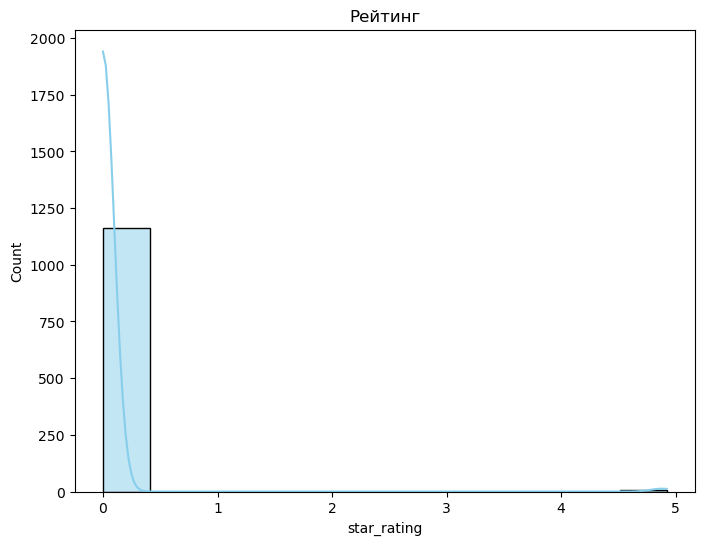

In [105]:
plt.figure(figsize=(8, 6))
sns.histplot(df['star_rating'], kde=True, color='skyblue')
plt.title('Рейтинг')
plt.show()

In [106]:
df['star_rating'].mean()

0.03337606837606837

In [107]:
df['star_rating'].median()

0.0

In [108]:
df['star_rating'].max()

4.92

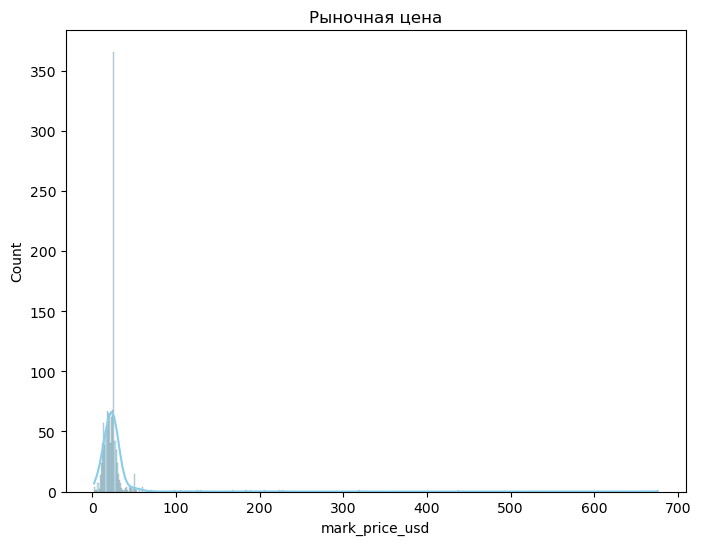

In [109]:
plt.figure(figsize=(8, 6))
sns.histplot(df['mark_price_usd'], kde=True, color='skyblue')
plt.title('Рыночная цена')
plt.show()

In [110]:
# стандартизицая данных (числовых переменных)
df_standardized = df.copy() # копия датафрейм
df_standardized[numeric_cols.columns] = (df_standardized[numeric_cols.columns] - df_standardized[numeric_cols.columns].mean()) / df_standardized[numeric_cols.columns].std()

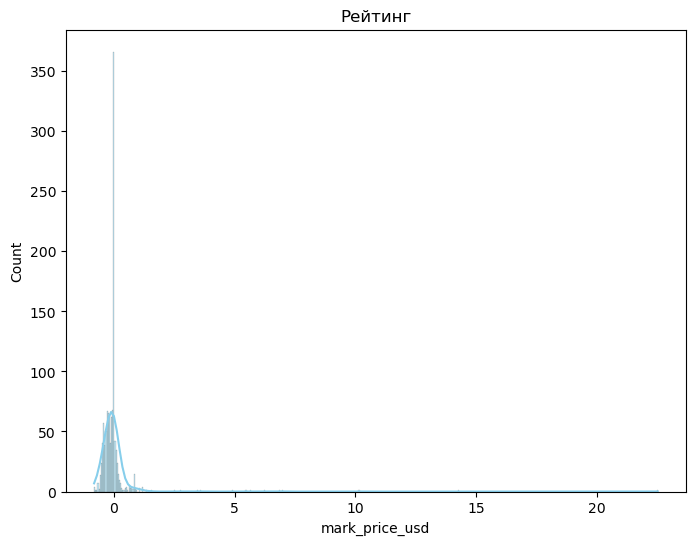

In [112]:
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['mark_price_usd'], kde=True, color='skyblue')
plt.title('Рейтинг')
plt.show()

In [113]:
label_encoder = LabelEncoder()
df['colour_encoded'] = label_encoder.fit_transform(df['colour'])

In [115]:
df.head()

,name,price_usd,mark_price_usd,star_rating,colour,review_count,colour_encoded
0,"Women's Casual Sports Shoes, Fashionable Versa...",19.40,24.40,4.83,: Khaki,77.000000,28
1,2024 New Spring/Autumn Women Breathable Mesh H...,14.90,18.80,0.00,: Black,426.979535,4
2,Women's Casual Slip-on Flat Skate Shoes With A...,7.50,18.80,4.92,: Black,66.000000,4
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",12.06,21.30,0.00,: Purple,41.000000,38
4,Women's Fashionable Casual Sneakers,13.53,17.05,0.00,: Grey,100.000000,26


In [116]:
# one hot encoding
df = pd.get_dummies(df, columns=['colour'], prefix='colour', drop_first=True)

In [117]:
df.head()

,name,price_usd,mark_price_usd,star_rating,review_count,colour_encoded,colour_: Army Green,colour_: Baby Pink,colour_: Beige,colour_: Black,...,colour_: WHITE,colour_: White,colour_: White Card,colour_: White Pink,colour_: White and Blue,colour_: White/Blue Leaf,colour_: Yellow,colour_: Yellow Blue,colour_: black flip flops,colour_: dark brown
0,"Women's Casual Sports Shoes, Fashionable Versa...",19.40,24.40,4.83,77.000000,28,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024 New Spring/Autumn Women Breathable Mesh H...,14.90,18.80,0.00,426.979535,4,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Women's Casual Slip-on Flat Skate Shoes With A...,7.50,18.80,4.92,66.000000,4,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",12.06,21.30,0.00,41.000000,38,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Women's Fashionable Casual Sneakers,13.53,17.05,0.00,100.000000,26,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
pivot_table = df.pivot_table(index='colour_encoded', values='mark_price_usd', aggfunc='mean')
pivot_table

,mark_price_usd
colour_encoded,
0,25.439852
1,25.996072
2,23.058429
3,24.373397
4,28.397481
5,9.300000
6,27.280000
7,24.949018
8,23.502143


In [125]:
df.to_csv('df_after_eda.csv', index=False)